In [1]:
import opendatasets as od
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
od.download("https://www.kaggle.com/uciml/breast-cancer-wisconsin-data")

Skipping, found downloaded files in "./breast-cancer-wisconsin-data" (use force=True to force download)


In [3]:
data = pd.read_csv("../data/breast-cancer-wisconsin-data/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Check for missing values in the dataset
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# drop any column that has all missing values and the id column as well
data = data.drop([data.columns[-1], 'id'], axis=1)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Separate target and features
target = data['diagnosis']
data = data.drop(['diagnosis'], axis=1)

In [9]:
# Convert categorical 'diagnosis' column to numerical values
target = target.map({'M': 1, 'B': 0}).astype(int) # 1 for malignant and 0 for benign

target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
# split the dataset into training and testing sets, with 10% of the data used for testing.
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1, random_state=42)
# train_data is used for training the model, train_target is the target variable(true outputs) for the training data
# test_data is used for testing the model, test_target is the target variable for the testing data

In [11]:
train_data, test_data

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 82        25.220         24.91          171.50     1878.0          0.10630   
 39        13.480         20.82           88.40      559.2          0.10160   
 271       11.290         13.04           72.23      388.0          0.09834   
 79        12.860         18.00           83.19      506.3          0.09934   
 2         19.690         21.25          130.00     1203.0          0.10960   
 ..           ...           ...             ...        ...              ...   
 71         8.888         14.64           58.79      244.0          0.09783   
 106       11.640         18.33           75.17      412.5          0.11420   
 270       14.290         16.82           90.30      632.6          0.06429   
 435       13.980         19.62           91.12      599.5          0.10600   
 102       12.180         20.52           77.22      458.7          0.08013   
 
      compactness_mean  concavity_mean  concave po

In [12]:
train_data.shape, test_data.shape

((512, 30), (57, 30))

In [13]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
sca = StandardScaler()
data = sca.fit_transform(train_data)

# scales the features of the training data using standard scaling. This standardizes data by removing the mean and scaling to unit variance
# This ensures that each feature has a mean of 0 and a standard deviation of 1.

In [15]:
# The same scaling is applied to the testing data. This is important because the model has been trained on scaled data, so it must also be tested on scaled data.
train_data = sca.transform(train_data)
test_data = sca.transform(test_data)

In [16]:
pd.DataFrame(train_data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.121332,1.306752,3.248510,3.425702,0.733053,3.033049,3.042526,3.505980,0.074546,0.706655,...,2.818496,1.273621,3.089819,2.907350,1.082228,2.223136,1.763205,2.583719,-0.872533,1.139351
1,-0.195574,0.354820,-0.158917,-0.281746,0.396762,0.391127,0.203498,0.138340,-0.318672,0.199172,...,-0.165183,0.042421,-0.012761,-0.256316,1.241824,1.050983,1.075407,1.663519,-0.158595,1.248131
2,-0.814315,-1.455946,-0.821950,-0.763028,0.163505,-0.534857,-0.715195,-0.556360,-0.141905,-0.009134,...,-0.827078,-1.551660,-0.875481,-0.747643,0.154846,-0.670201,-0.710680,-0.426196,-0.275479,-0.213868
3,-0.370743,-0.301525,-0.372547,-0.430460,0.235056,-0.171733,-0.637359,-0.670246,-0.325887,-0.390794,...,-0.431178,-0.151979,-0.471016,-0.461774,-0.142779,-0.268718,-0.493781,-0.550703,-0.202822,-0.270433
4,1.558939,0.454901,1.546847,1.528123,0.969173,1.035681,1.339857,2.041001,0.940346,-0.387998,...,1.492646,-0.036959,1.330501,1.425901,0.525799,1.063648,0.825212,1.923411,1.114487,0.186441


In [17]:
# convert the target to tensor
train_data = torch.tensor(train_data, dtype=torch.float64)
test_data = torch.tensor(test_data, dtype=torch.float64)
train_target = torch.tensor(train_target.values, dtype=torch.float64)
test_target = torch.tensor(test_target.values, dtype=torch.float64)

In [18]:
train_target

tensor([1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 

In [19]:
# Create a model
class LRModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1) # input_dim is the number of features in the input data
        self.sigmoid = nn.Sigmoid() # sigmoid activation function to convert the output to a probability

    def forward(self, x):
        output0 = self.linear(x)
        output1 = self.sigmoid(output0) # apply the sigmoid activation function
        return output1 # return the probability

model = LRModel(train_data.shape[1])

In [20]:
loss = nn.BCELoss() # Binary Cross Entropy Loss -> loss function for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # SGD optimizer

In [21]:
# Train the model and validate it
num_epochs = 10000
train_loss = []
test_loss = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_data.float())
    y_pred = y_pred.squeeze()
    loss_value = loss(y_pred, train_target.float())
    loss_value.backward()
    optimizer.step()
    train_loss.append(loss_value.item())

    model.eval()
    y_pred = model(test_data.float())
    y_pred = y_pred.squeeze()
    loss_value = loss(y_pred, test_target.float())
    test_loss.append(loss_value.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch + 1}, Training Loss: {train_loss[-1]}, Test Loss: {test_loss[-1]}')


Epoch: 10, Training Loss: 0.7430297136306763, Test Loss: 0.7458170056343079
Epoch: 20, Training Loss: 0.7193140983581543, Test Loss: 0.7237748503684998
Epoch: 30, Training Loss: 0.6970258951187134, Test Loss: 0.7030025124549866
Epoch: 40, Training Loss: 0.676088273525238, Test Loss: 0.6834333539009094
Epoch: 50, Training Loss: 0.6564223170280457, Test Loss: 0.6649986505508423
Epoch: 60, Training Loss: 0.637948751449585, Test Loss: 0.6476293206214905
Epoch: 70, Training Loss: 0.6205889582633972, Test Loss: 0.6312577724456787
Epoch: 80, Training Loss: 0.6042670011520386, Test Loss: 0.6158174872398376
Epoch: 90, Training Loss: 0.588909924030304, Test Loss: 0.6012449860572815
Epoch: 100, Training Loss: 0.5744486451148987, Test Loss: 0.5874800682067871
Epoch: 110, Training Loss: 0.5608178377151489, Test Loss: 0.5744655132293701
Epoch: 120, Training Loss: 0.5479569435119629, Test Loss: 0.5621480941772461
Epoch: 130, Training Loss: 0.5358094573020935, Test Loss: 0.5504779815673828
Epoch: 140,

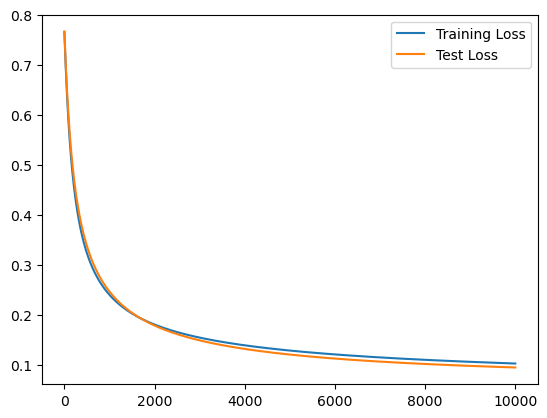

In [22]:
# Plot the training and test loss

plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.show()


In [23]:
# Calculate the accuracy of the model

model.eval()
with torch.no_grad():
    y_pred = model(test_data.float())
    y_pred = y_pred.squeeze()
    y_pred = torch.round(y_pred) # round the output to 0 or 1
    accuracy = (y_pred == test_target).sum() / test_target.shape[0]
    print(f'Accuracy: {accuracy.item()}')

# Save the model
torch.save(model.state_dict(), 'breast_cancer_model.pth')


Accuracy: 0.9649122953414917
